#**Importing the Required Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing  os to create a helper variable, which allows us to easily manages different paths in the code
import os


In [3]:

#glob is used to return all file paths that match a specific pattern.
import glob

In [4]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display

from IPython.display import Image, display

In [5]:
# To clear output in the notebook use clear_output function
#display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Sun Aug 20 03:01:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [9]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [10]:
#!pip install ultralytics==8.0.0

In [11]:
!git clone https://github.com/MuhammadMoin97/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 3857, done.
remote: Total 3857 (delta 0), reused 0 (delta 0), pack-reused 3857
Receiving objects: 100% (3857/3857), 1.82 MiB | 9.64 MiB/s, done.
Resolving deltas: 100% (2675/2675), done.


#**Setting the Current Directory**

In [12]:
%cd {HOME}/ultralytics

/content/ultralytics


#**Installing all the Dependencies**

In [13]:
!pip install -e '.[dev]'

Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.0/229.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 24.9 MB/s eta 0:00:0

##Checking whether YOLOv8 is Installed and its working Fine

In [14]:
import ultralytics

In [15]:
ultralytics.checks()

Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


#**Importing the Traffic Lights Dataset from Roboflow**

In [16]:
HOME = '/content/ultralytics/ultralytics/yolo/v8/detect'

In [17]:
%cd {HOME}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iOqPD5zonb3Ou6XZ2Xpe")
project = rf.workspace("wawan-pradana").project("cinta_v2")
dataset = project.version(1).download("yolov5")

/content/ultralytics/ultralytics/yolo/v8/detect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c3024982b894e7ac61b936f8f5c04d3dcfd2bcdde9c3222c58cd33e523b6e31d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsin

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cinTA_v2-1 in yolov5pytorch:: 100%|██████████| 4806/4806 [00:01<00:00, 4025.30it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [18]:
%cd {HOME}

/content/ultralytics/ultralytics/yolo/v8/detect


In [19]:
%cd {dataset.location}

/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1


In [20]:
%cd {HOME}

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

/content/ultralytics/ultralytics/yolo/v8/detect
100% 83.7M/83.7M [00:00<00:00, 215MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False,

In [21]:
!ls {HOME}/runs/detect/train

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch3960.jpg
events.out.tfevents.1692500594.cefd432fe266.1007.0  train_batch3961.jpg
F1_curve.png					    train_batch3962.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1.jpg


#**Displaying the Confusion Matrix**

/content/ultralytics/ultralytics/yolo/v8/detect


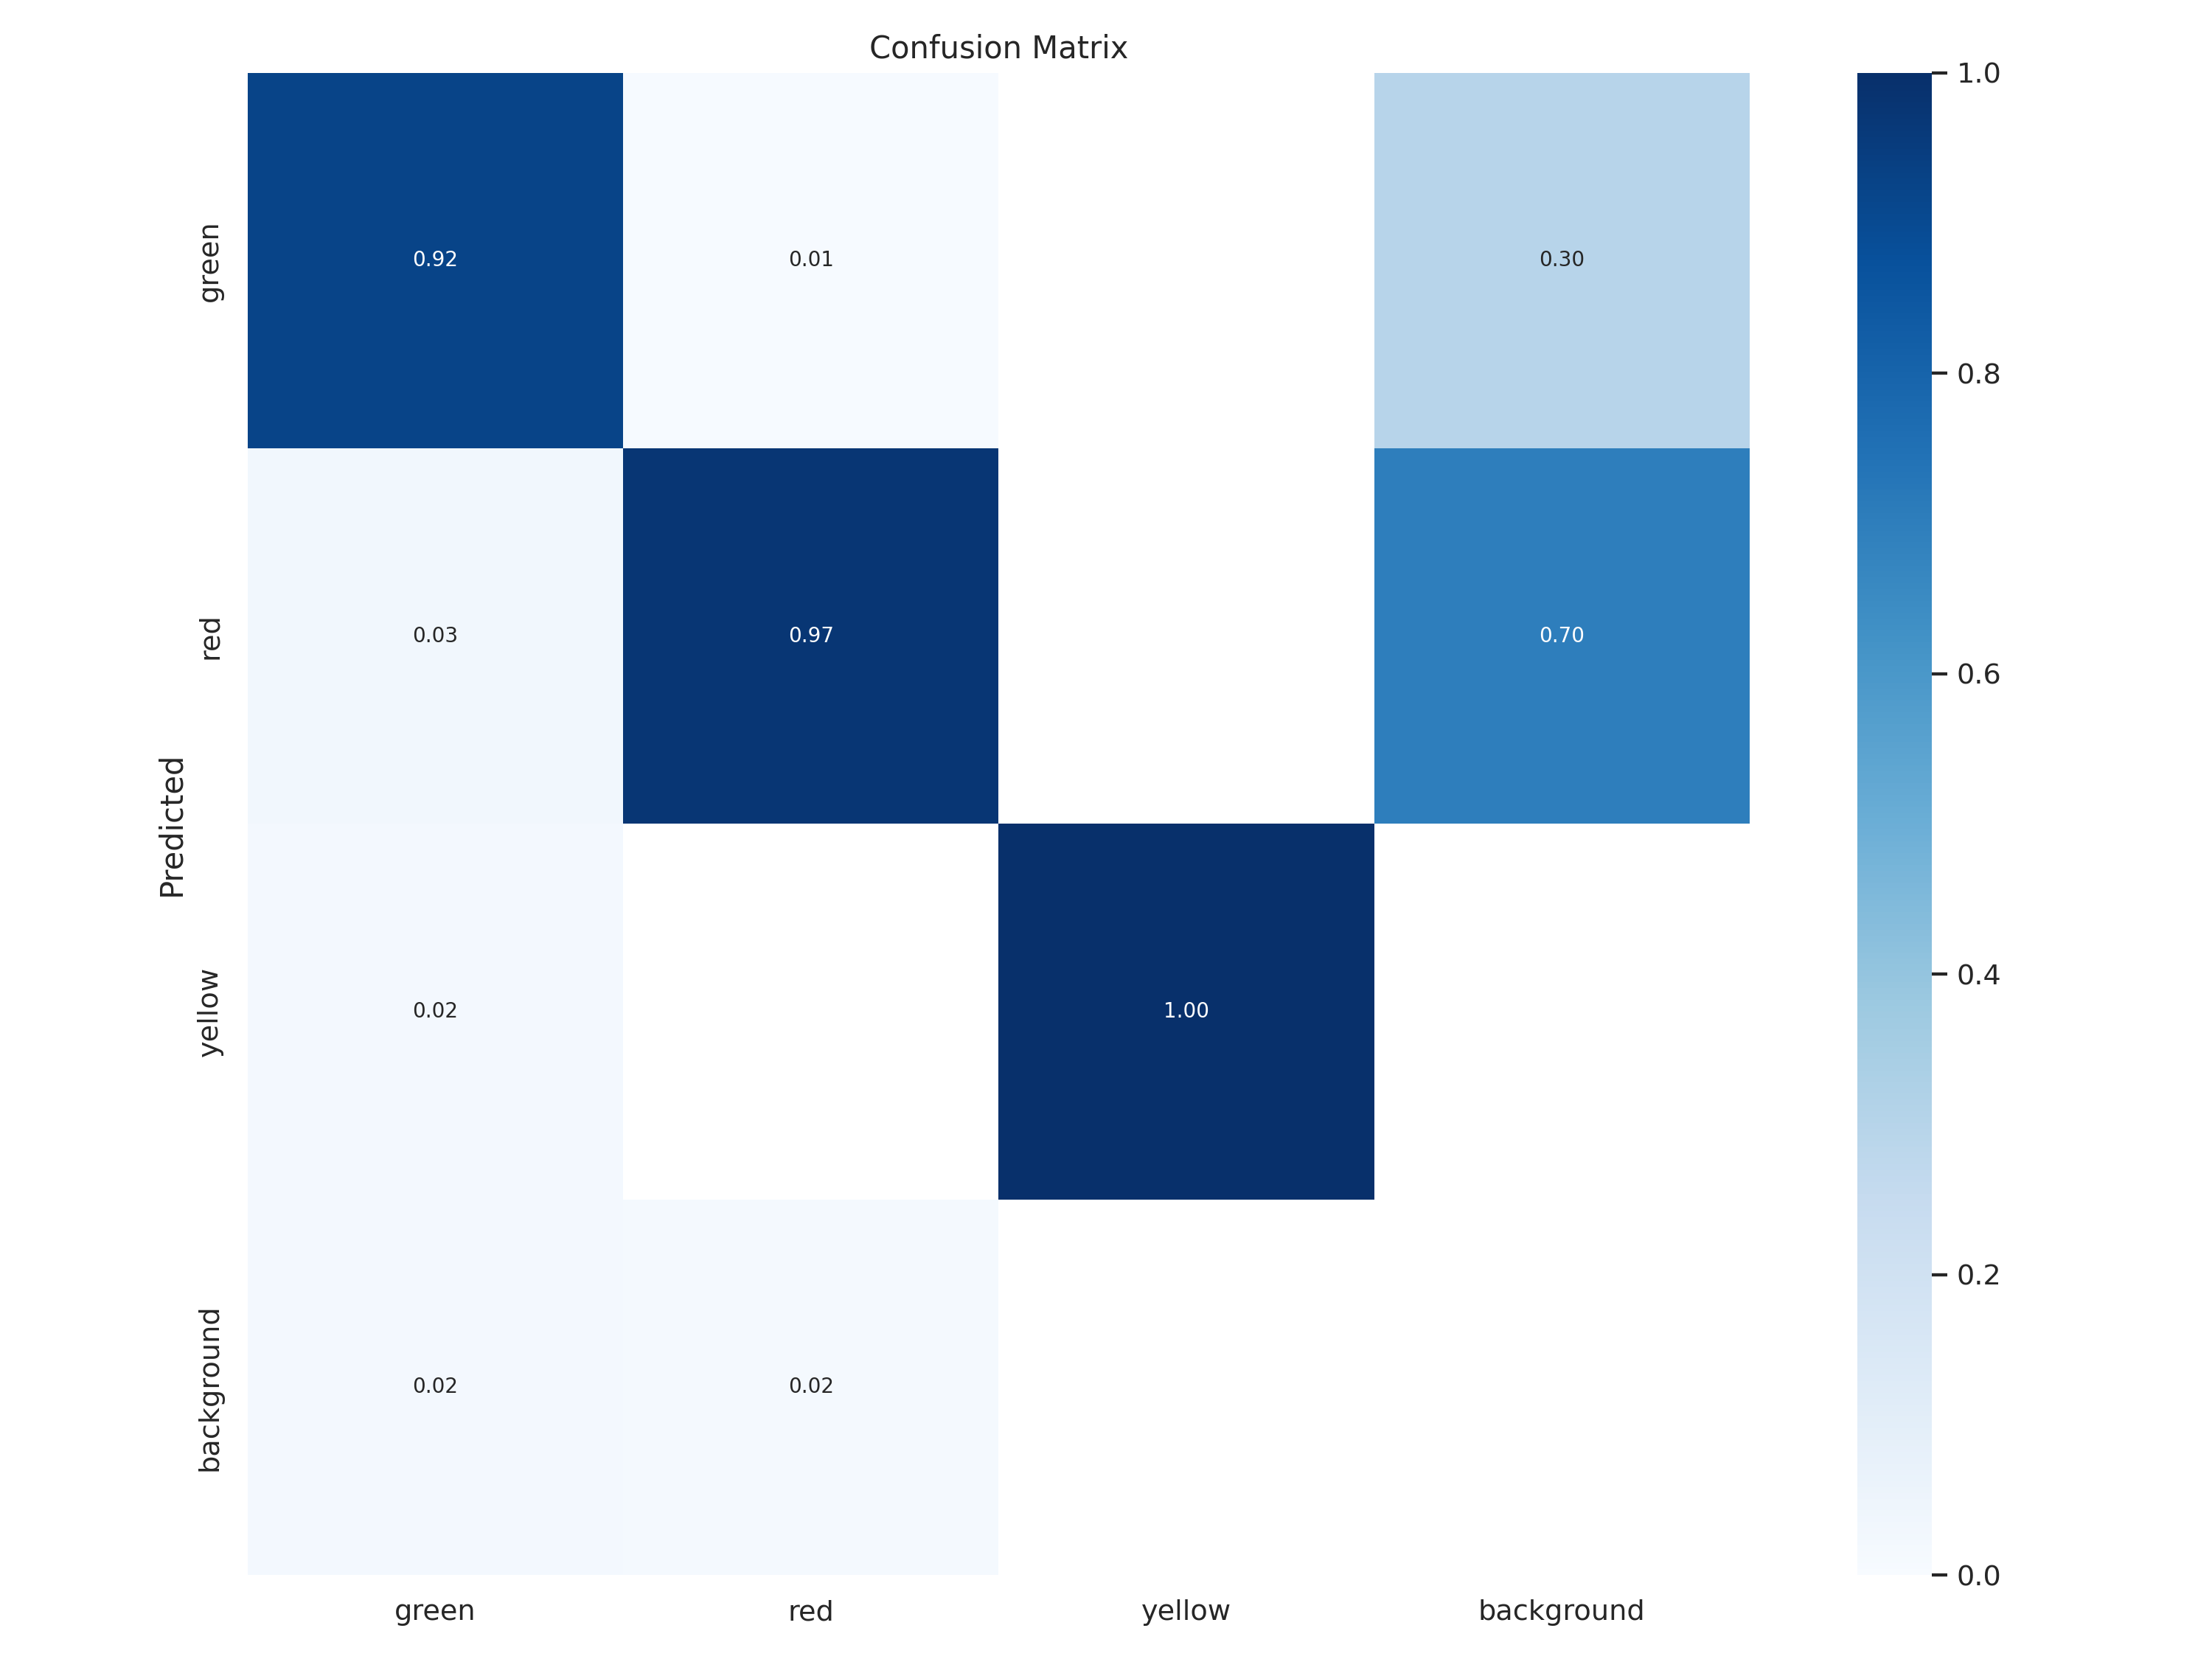

In [22]:
#Confusion matrix is the chart that shows how our model handles different classes
#96% of the time the model detected correctly that currently the green light is on, while 2% of the time we get the Bounding Box but
#the green light is incorrectly classified as red light, while 1% of the time we also get the bounding box but the green light
#is incorrectly classified as yellow,  light while 1% of the time when the green light is on the model is unable to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content/ultralytics/ultralytics/yolo/v8/detect


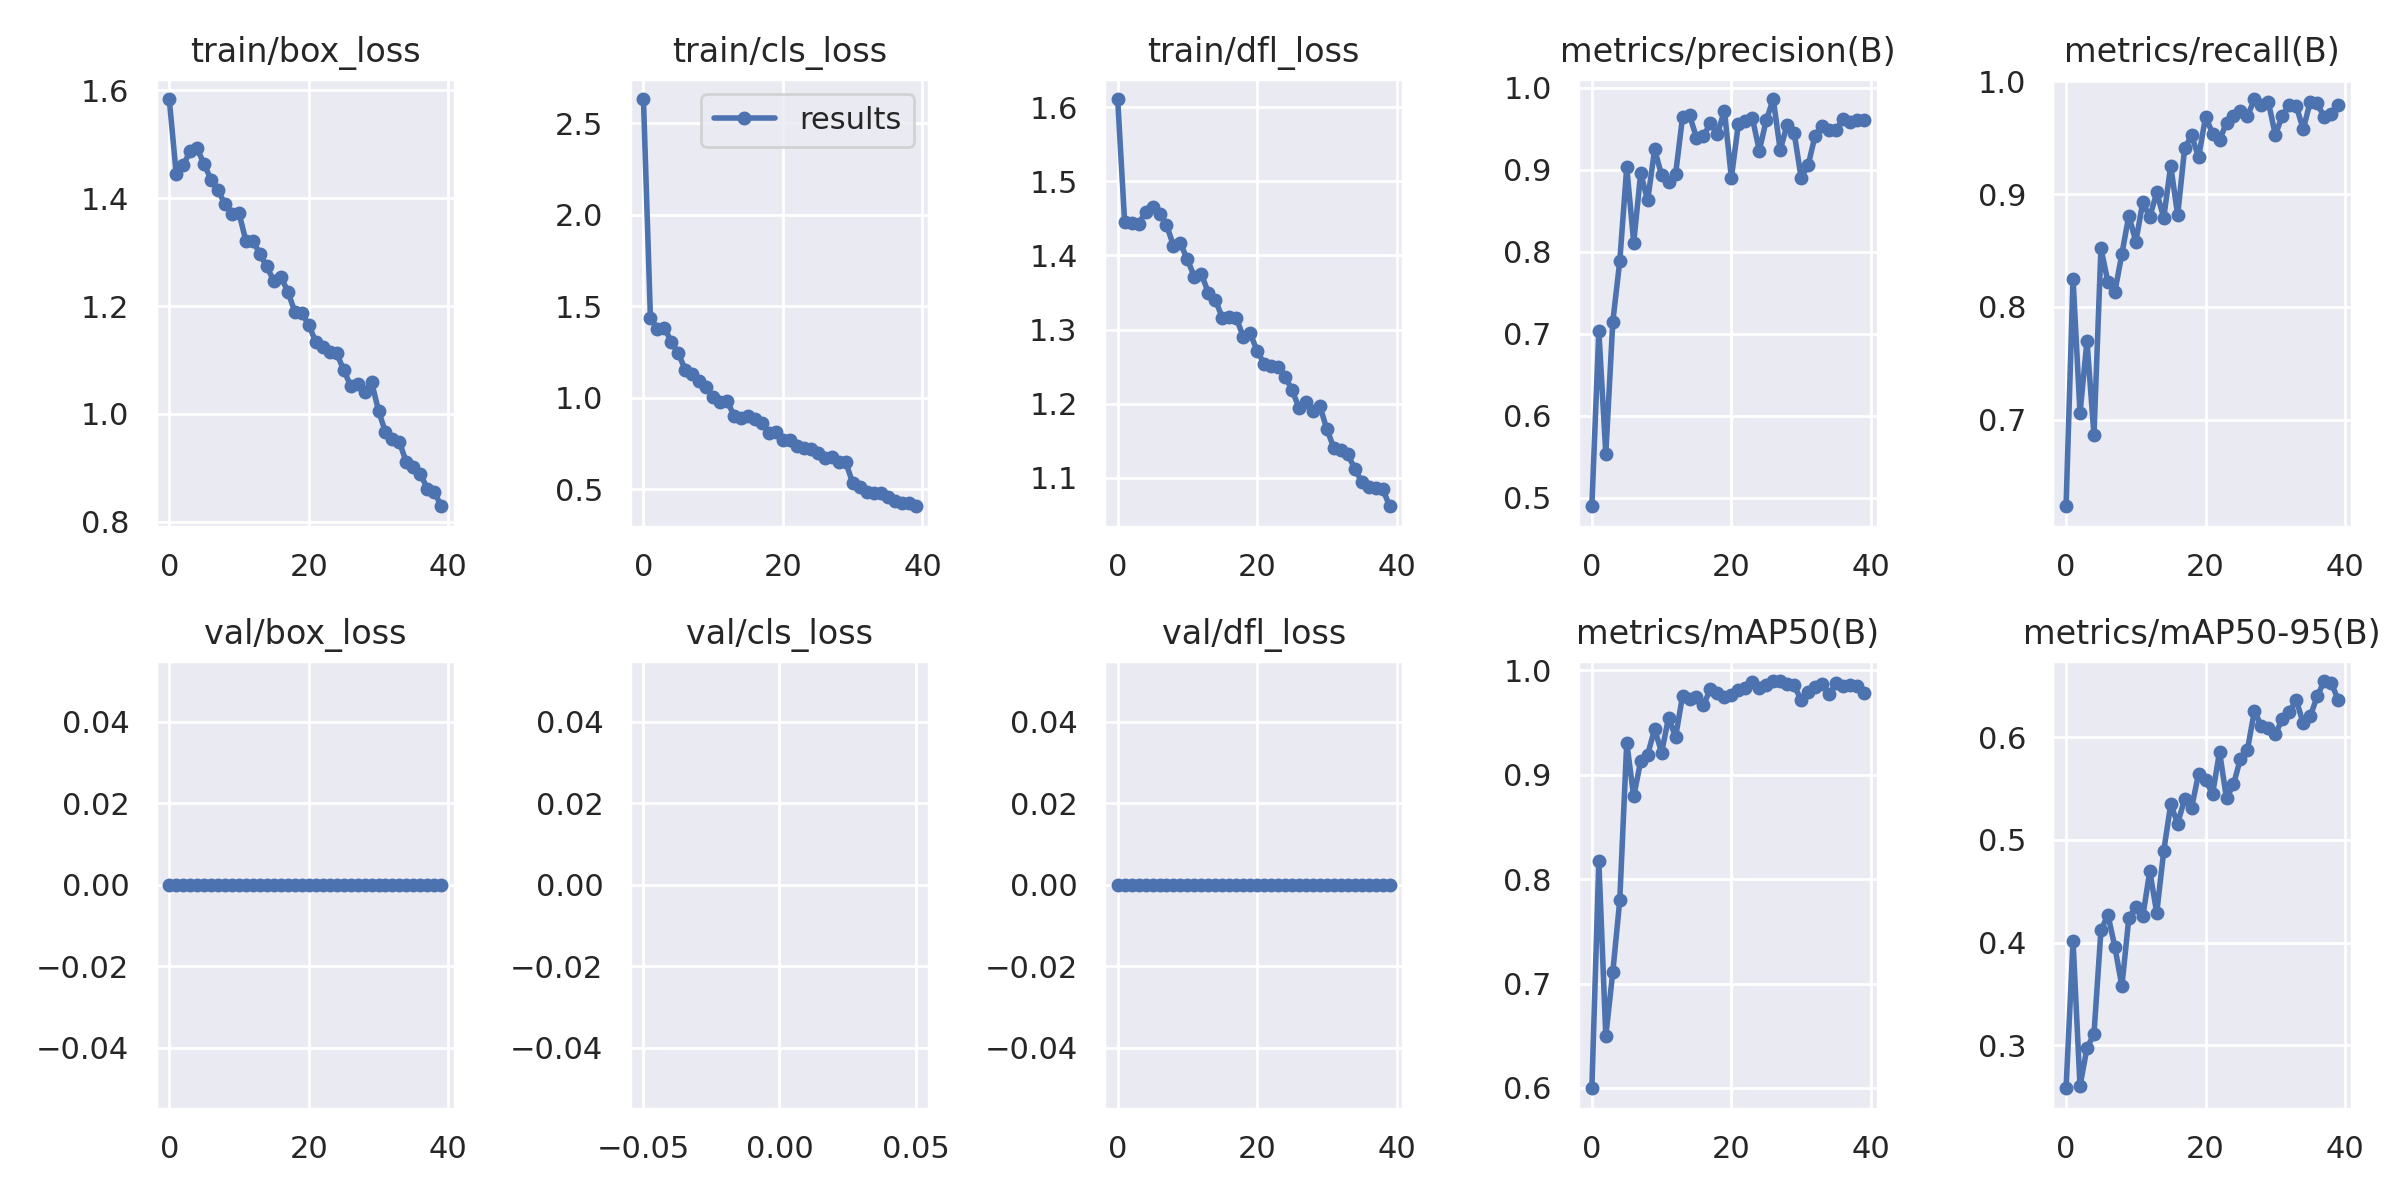

In [23]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [24]:
#Here, we are taking the model best weights and using them to validate the model

%cd {HOME}

!python val.py model='{HOME}/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

/content/ultralytics/ultralytics/yolo/v8/detect
2023-08-20 04:15:49.733592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 04:15:51.685196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:12<00:00,  1.04it/s]
                   all        200        272     

#**Inference with Custom Model**

In [25]:
# Testing the Model on Test Dataset images
%cd {HOME}

!python predict.py model='{HOME}/runs/detect/train/weights/best.pt' source='/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/test/images'

/content/ultralytics/ultralytics/yolo/v8/detect
2023-08-20 04:16:18.105702: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 04:16:19.095338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
image 1/100 /content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/test/images/traffic-light--119-_jpg.rf.65198e341a15fa6a0ba8be43a289c5f2.jpg: 640x640 1 yellow, 55.6ms
image 2/100 /content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/test/images/traffic-light--122-_jpg.rf.63cb9e27085f500f6936833c196db2b8.jpg: 640x640 1 yellow,

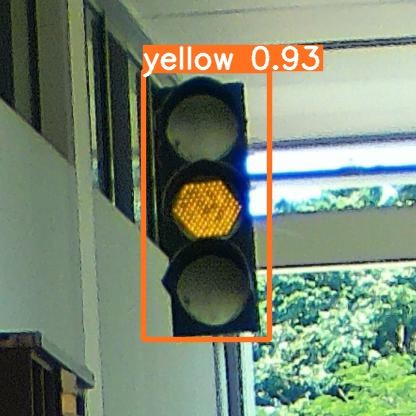

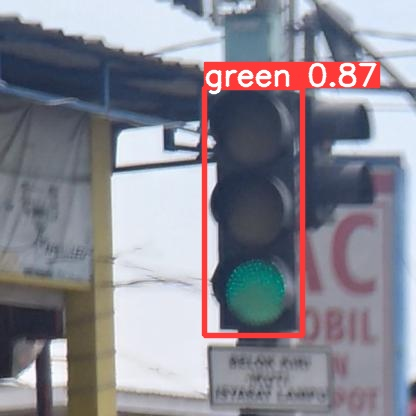

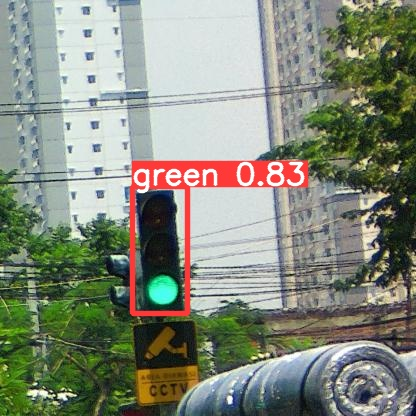

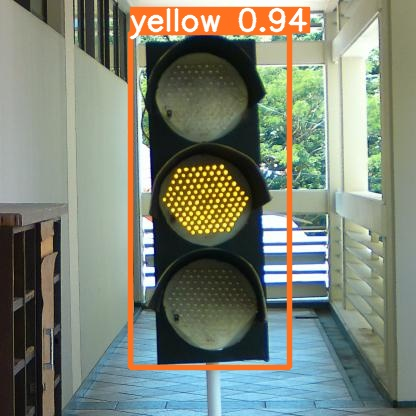

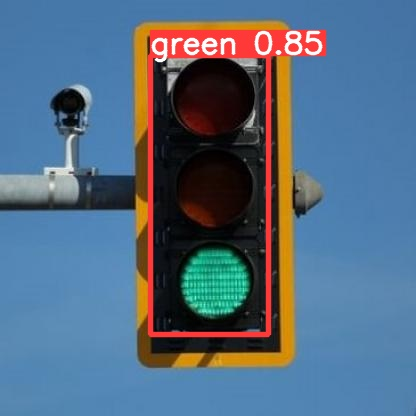

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train3/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [27]:
!gdown "https://drive.google.com/uc?id=1rCRcTpoLWxGi26gDdpnI-Nv6t2Ybi8rA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1rCRcTpoLWxGi26gDdpnI-Nv6t2Ybi8rA&confirm=t
To: /content/ultralytics/ultralytics/yolo/v8/detect/video1.mp4
100% 4.50M/4.50M [00:00<00:00, 39.2MB/s]


In [28]:
%cd {HOME}

!python predict.py model='{HOME}/runs/detect/train/weights/best.pt' source='video1.mp4' conf=0.45

/content/ultralytics/ultralytics/yolo/v8/detect
2023-08-20 04:28:24.102786: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 04:28:25.133809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
video 1/1 (1/183) /content/ultralytics/ultralytics/yolo/v8/detect/video1.mp4: 384x640 67.5ms
video 1/1 (2/183) /content/ultralytics/ultralytics/yolo/v8/detect/video1.mp4: 384x640 40.8ms
video 1/1 (3/183) /content/ultralytics/ultralytics/yolo/v8/detect/video1.mp4: 384x640 39.9ms
video 1/1 (4/183) /content/ultralytics/ultralytics/yolo/v8/

#**Display the Demo Video**

In [29]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [30]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train4/video1.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video2**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Bm2XklAu83XJiP6C3-6hAEu-tzbGUv6K&confirm=t"

#**Testing on the Demo Video**

In [ ]:
%cd {HOME}

!python predict.py model='{HOME}/runs/detect/train2/weights/best.pt' source='video2.mp4'

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train13/video2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video3**

In [ ]:
!gdown "https://drive.google.com/uc?id=1PuC8imuJk3Wx-LILQVAtGw8Fuy5Kz8yR&confirm=t"

#**Testing on the Demo Video**

In [ ]:
%cd {HOME}

!python predict.py model='{HOME}/runs/detect/train2/weights/best.pt' source='video3.mp4'

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train14/video3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [32]:
!cp -r "/content/ultralytics" "/content/drive/My Drive/"

In [33]:
%cd {HOME}

!python predict.py model='{HOME}/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/Data/Traffic Light/sang.mp4'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
video 1/1 (36838/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 21.6ms
video 1/1 (36839/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 20.5ms
video 1/1 (36840/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 22.6ms
video 1/1 (36841/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 22.0ms
video 1/1 (36842/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 21.2ms
video 1/1 (36843/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 21.0ms
video 1/1 (36844/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 22.5ms
video 1/1 (36845/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 21.7ms
video 1/1 (36846/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 20.8ms
video 1/1 (36847/41835) /content/drive/MyDrive/Data/Traffic Light/sang.mp4: 384x640 21.3ms
video 1/1 (36848/41835) /content/

In [34]:
!cp -r "/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train5/sang.mp4" "/content/drive/My Drive/"

In [35]:
!rm "/content/result_compressed.mp4"

In [37]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train5/sang.mp4'


# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [40]:
%cd {HOME}

!python predict.py model='{HOME}/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/Data/Traffic Light/toi.mp4'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
video 1/1 (53041/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 19.9ms
video 1/1 (53042/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 20.7ms
video 1/1 (53043/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 20.1ms
video 1/1 (53044/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 19.8ms
video 1/1 (53045/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 20.3ms
video 1/1 (53046/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 19.9ms
video 1/1 (53047/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 20.9ms
video 1/1 (53048/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 20.8ms
video 1/1 (53049/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 19.6ms
video 1/1 (53050/58038) /content/drive/MyDrive/Data/Traffic Light/toi.mp4: 384x640 19.6ms
video 1/1 (53051/58038) /content/drive/MyDr

In [41]:
!cp -r "/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train7/toi.mp4" "/content/drive/My Drive/"

## 2 video lớn quá gg coolab không hiện được nên em nộp file riêng nha thầy

https://drive.google.com/drive/folders/1I-xn4tvdvfXVlNs1tniAhe6vuoeTPUNs?usp=drive_link